## import basic libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Import dataset


In [2]:
data = pd.read_csv("spam.csv", encoding="latin")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
#Print list of columns in our imported file
columns = list(data.columns)
columns

['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

In [4]:
#Renaming the columns for ease of using them later
data.rename(columns={'v1':'Spam/Ham','v2':'Email Text'},inplace=True)

In [5]:
#getting only the columns to be used
data = data[['Spam/Ham', 'Email Text']]

In [6]:
# check rows and columns
data.shape

(5572, 2)

In [7]:
# check for the null values
data.isnull().sum()

Spam/Ham      0
Email Text    0
dtype: int64

In [8]:
# the summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Spam/Ham    5572 non-null   object
 1   Email Text  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
# checking for the column names
data.columns

Index(['Spam/Ham', 'Email Text'], dtype='object')

In [10]:
# Before Removing Duplicates
data.duplicated().sum()

403

In [11]:
data.head()

,Spam/Ham,Email Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# as we can see there are two Target named columns lets remove one
data = data.drop_duplicates(subset=['Email Text'], keep='first')

In [13]:
# After Removing Duplicates
data.duplicated().sum()

0

## Step#01

In [14]:
from wordcloud import WordCloud

# Step 1: Calculate and display class distribution
class_distribution = data['Spam/Ham'].value_counts()
print("Class Distribution:")
print(class_distribution)


Class Distribution:
ham     4516
spam     653
Name: Spam/Ham, dtype: int64


## Step#02


In [15]:
# Step 2: Text Analysis - Calculate Email Lengths and Display Statistics
data['Email Length'] = data['Email Text'].apply(lambda x: len(x))
email_lengths = data.groupby('Spam/Ham')['Email Length'].describe()
print("\nEmail Length Statistics:")
email_lengths


Email Length Statistics:


,count,mean,std,min,25%,50%,75%,max
Spam/Ham,,,,,,,,
ham,4516.0,70.459256,56.358207,2.0,34.0,52.0,90.0,910.0
spam,653.0,137.891271,30.137753,13.0,132.0,149.0,157.0,224.0


## Step#03

In [16]:
# Step 3: Word Frequency Analysis
spam_emails = data.loc[data['Spam/Ham'] == 'spam', 'Email Text']
non_spam_emails = data.loc[data['Spam/Ham'] == 'ham', 'Email Text']


## Step#04

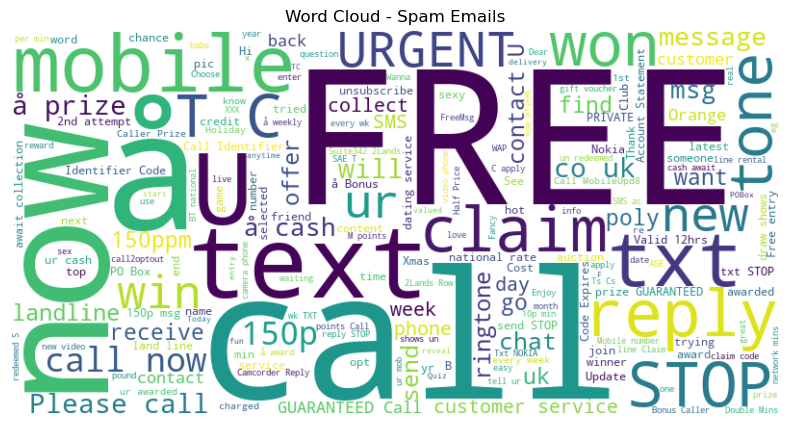

In [17]:
# Step 4: Word Cloud for Spam Emails
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_emails))
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Spam Emails')
plt.axis('off')
plt.show()


## Box Plot

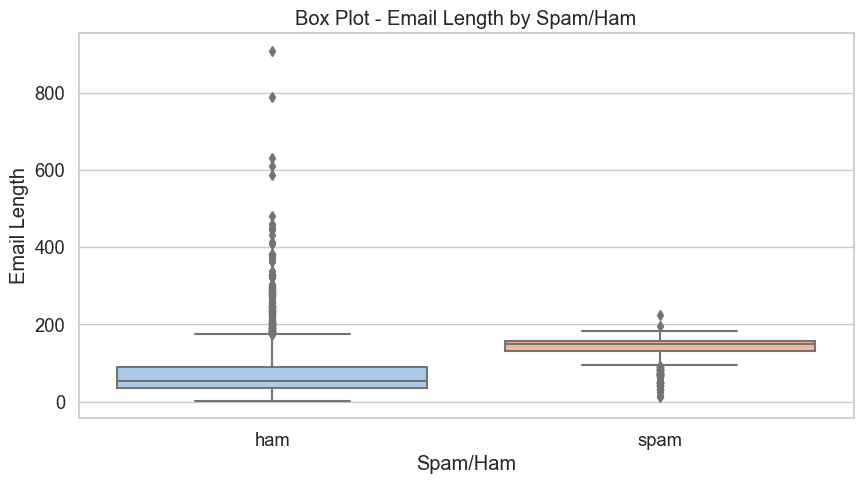

In [34]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Spam/Ham', y='Email Length', data=data)
plt.title('Box Plot - Email Length by Spam/Ham')
plt.ylabel('Email Length')
plt.show()


## Count Plot

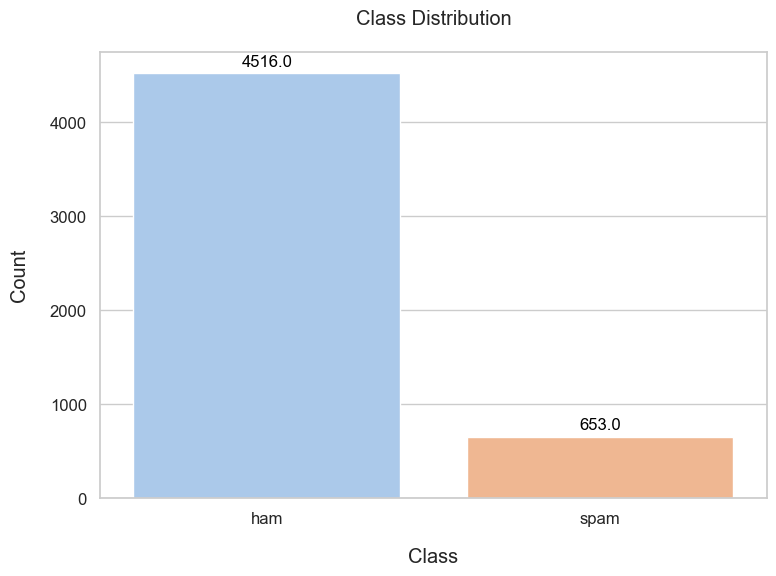

In [20]:
sns.set_theme(style='whitegrid', font_scale=1.2, palette='pastel')  # Set the style and palette

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Spam/Ham', data=data)
plt.title('Class Distribution', pad=20)  # Add some padding to the title
plt.xlabel('Class', labelpad=15)  # Add some padding to the x-axis label
plt.ylabel('Count', labelpad=15)  # Add some padding to the y-axis label
plt.xticks(fontsize=12)  # Increase the font size of x-axis labels
plt.yticks(fontsize=12)  # Increase the font size of y-axis labels

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


## Histogram

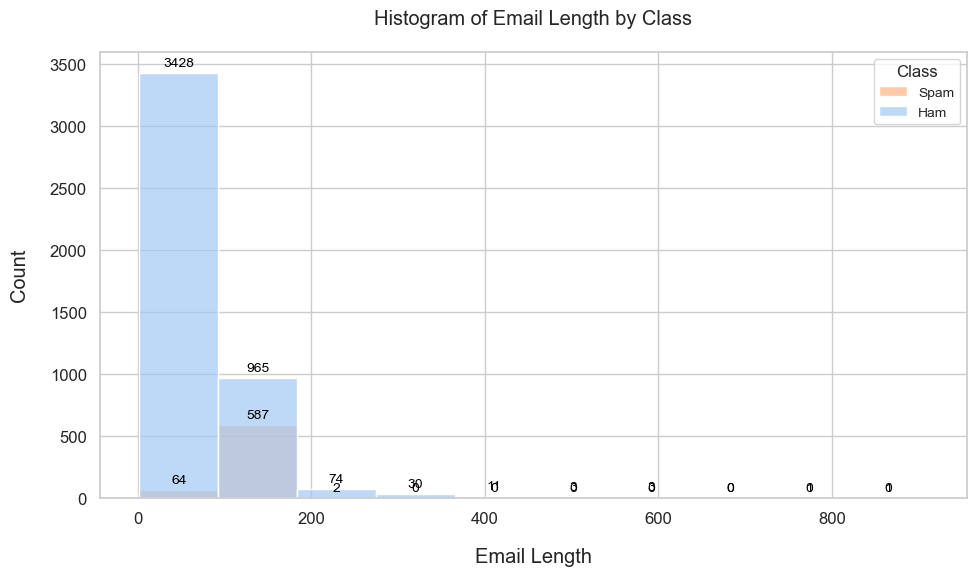

In [22]:
sns.set_theme(style='whitegrid', font_scale=1.2, palette='pastel')  # Set the style and palette

plt.figure(figsize=(10, 6))
ax = sns.histplot(data, x='Email Length', hue='Spam/Ham', bins=10, kde=False, alpha=0.7)
plt.title('Histogram of Email Length by Class', pad=20)  # Add some padding to the title
plt.xlabel('Email Length', labelpad=15)  # Add some padding to the x-axis label
plt.ylabel('Count', labelpad=15)  # Add some padding to the y-axis label
plt.xticks(fontsize=12)  # Increase the font size of x-axis labels
plt.yticks(fontsize=12)  # Increase the font size of y-axis labels

# Set legend labels and customize font size
legend_labels = ['Spam', 'Ham']
ax.legend(title='Class', labels=legend_labels, title_fontsize=12, fontsize=10)

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


## Bar Plot

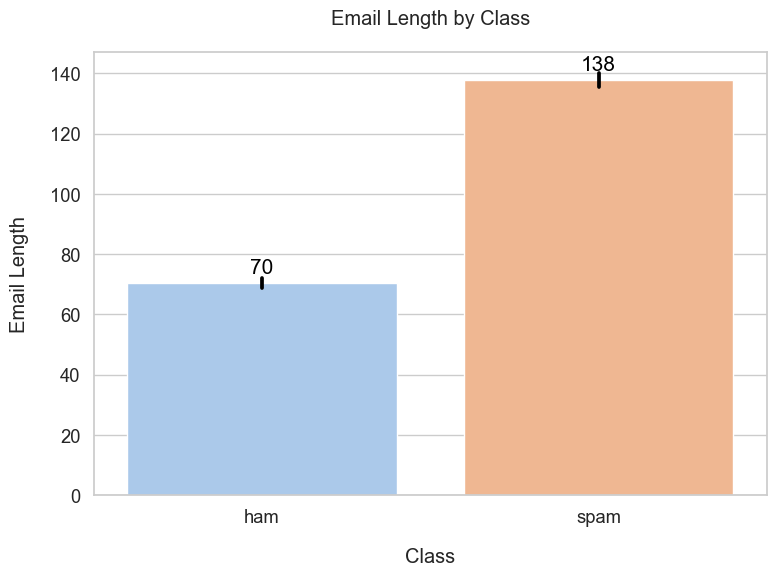

In [23]:
data['Email Length'] = data['Email Text'].str.len()

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=data, x='Spam/Ham', y='Email Length', palette='pastel', errcolor='black')
plt.title('Email Length by Class', pad=20)
plt.xlabel('Class', labelpad=15)
plt.ylabel('Email Length', labelpad=15)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=15, color='black', xytext=(0, 7),
                textcoords='offset points')

plt.tight_layout()
plt.show()


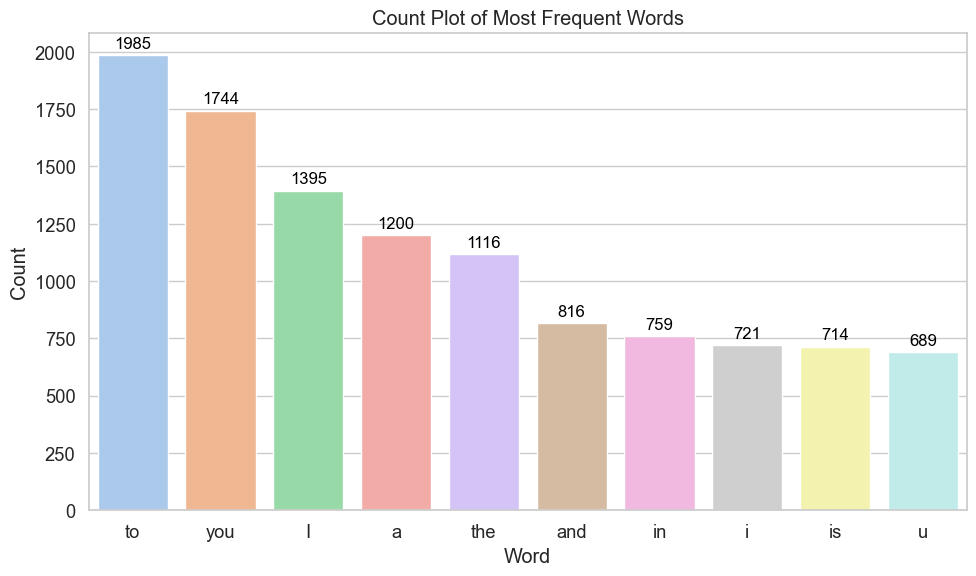

In [35]:
# Vectorize the email text and calculate word frequencies
word_freq = data['Email Text'].str.split().explode().value_counts().head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=word_freq.index, y=word_freq.values, palette='pastel')
plt.title('Count Plot of Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Count')

# Annotate bars with exact count values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


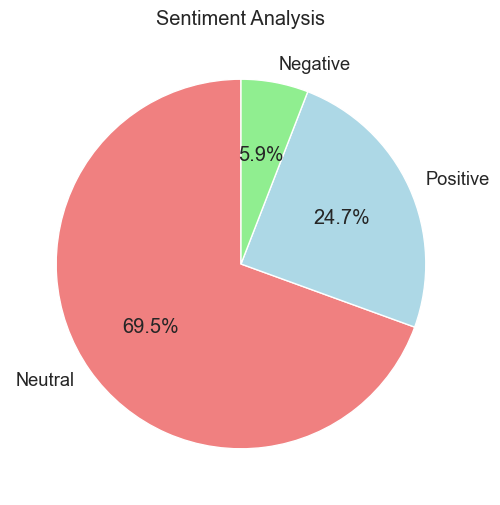

In [36]:
# Perform sentiment analysis on email text
sia = SentimentIntensityAnalyzer()
data['Sentiment'] = data['Email Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize sentiments and plot the pie chart
sentiment_categories = data['Sentiment'].apply(lambda x: 'Negative' if x < -0.5 else ('Neutral' if -0.5 <= x <= 0.5 else 'Positive'))

plt.figure(figsize=(8, 6))
sentiment_categories.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Sentiment Analysis')
plt.ylabel('')

plt.show()


In [26]:
# Step 6: Text Preprocessing (Example: Removing punctuation)
data['Email Text'] = data['Email Text'].str.replace('[^\w\s]', '')

C:\Users\shaik\AppData\Local\Temp\ipykernel_9432\4158312546.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Email Text'] = data['Email Text'].str.replace('[^\w\s]', '')


In [27]:
# Print a sample of the preprocessed email texts
print("\nSample Preprocessed Email Texts:")
data['Email Text'].head()


Sample Preprocessed Email Texts:


0    Go until jurong point crazy Available only in ...
1                              Ok lar Joking wif u oni
2    Free entry in 2 a wkly comp to win FA Cup fina...
3          U dun say so early hor U c already then say
4    Nah I dont think he goes to usf he lives aroun...
Name: Email Text, dtype: object

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['Email Text'], data['Spam/Ham'], test_size=0.2, random_state=42)

# Feature extraction using TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


### Naive Bayes Classifier


In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_predictions = nb_classifier.predict(X_test_tfidf)

print("Naive Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print("Precision:", precision_score(y_test, nb_predictions, pos_label='spam'))
print("Recall:", recall_score(y_test, nb_predictions, pos_label='spam'))
print("F1-Score:", f1_score(y_test, nb_predictions, pos_label='spam'))


Naive Bayes Classifier:
Accuracy: 0.9468085106382979
Precision: 1.0
Recall: 0.6206896551724138
F1-Score: 0.7659574468085107


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have loaded and preprocessed the data and have X_train, X_test, y_train, and y_test

# Convert labels to numerical using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Create a pipeline with CountVectorizer and Naive Bayes Classifier
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),  
    ('classifier', MultinomialNB()) 
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train_encoded)

# New email text for prediction
new_email_text = "This is a random mail to check if it is spam or not"

# Predict the label for the new email
prediction_encoded = pipeline.predict([new_email_text])

# Convert the numerical prediction back to original labels using inverse_transform
prediction = label_encoder.inverse_transform(prediction_encoded)

# Print prediction
print("Prediction:", prediction)


Prediction: ['ham']


## Support Vector Machine

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)
svm_predictions = svm_classifier.predict(X_test_tfidf)

print("\nSupport Vector Machine (SVM) Classifier:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Precision:", precision_score(y_test, svm_predictions, pos_label='spam'))
print("Recall:", recall_score(y_test, svm_predictions, pos_label='spam'))
print("F1-Score:", f1_score(y_test, svm_predictions, pos_label='spam'))



Support Vector Machine (SVM) Classifier:
Accuracy: 0.9796905222437138
Precision: 0.9920634920634921
Recall: 0.8620689655172413
F1-Score: 0.9225092250922509


## Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)
rf_predictions = rf_classifier.predict(X_test_tfidf)

print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Precision:", precision_score(y_test, rf_predictions, pos_label='spam'))
print("Recall:", recall_score(y_test, rf_predictions, pos_label='spam'))
print("F1-Score:", f1_score(y_test, rf_predictions, pos_label='spam'))



Random Forest Classifier:
Accuracy: 0.9700193423597679
Precision: 1.0
Recall: 0.7862068965517242
F1-Score: 0.8803088803088803


## Thanks
## Wasay Ahmed Shaikh
